# Introduction
Before beginning the data quality report I import the data set and remove all rows which contain weather data outside of the required time period (i.e., the year 2018). Although this could have been completed later, it meant that the dataset was dramatically reduced in size and therefore quicker and easier to work with throughout the DQR.

|Feature|Description|Unit|
|---|---|---|
|dt|Time of data calculation|UTC|
|dt_iso|Date and time in UTC format|UTC|
|timezone|Shift in seconds from UTC|seconds|
|city_name|City name|   |
|lat|Geographical coordinates of the location (latitude)||
|lon|Geographical coordinates of the location (longitude)||
|temp|temperature|degrees celcius|
|visibility|Average visibility. The maximum value of the visibility is 10km.| metres|
|dew_point|Atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form|degrees celcius|
|feels_like|This temperature parameter accounts for the human perception of weather|degrees celcius|
|temp_min|Minimum temperature at the moment. This is deviation from temperature that is possible for large cities and megalopolises geographically expanded|degrees celcius|
|temp_max|Maximum temperature at the moment. This is deviation from temperature that is possible for large cities and megalopolises geographically expanded|degrees celcius|
|pressure| Atmospheric pressure (on the sea level)|hPa|
|sea_level| |   |
|grnd_level|    |   |
|humidity|humidity|%|
|wind_speed| Wind speed| meter/sec|
|wind_deg|Wind direction|degrees (meterorological|
|wind_gust|wind gust|meter/sec|
|rain_1h|Rain volume for the last hour| mm|
|rain_3h|Rain volume for the last 3 hours| mm|
|snow_1h|Snow volume for the last hour, (in liquid state)| mm|
|snow_3h|Snow volume for the last 3 hours, (in liquid state)| mm|
|clouds_all|Cloudiness| %|
|weather_id|Weather condition ID|   |
|weather_main|Group of weather parameters (Rain, Snow, Extreme etc.)|   |
|weather_description|Weather condition within the group|    |
|weather_icon|Weather icon ID|  |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/rebeccadillon/git/dublin-bus-team-5/data/raw_data/dublin_weather_2018.csv")

In [3]:
df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1514764800,2018-01-01 00:00:00 +0000 UTC,0,Dublin,53.349805,-6.26031,4.39,9999.0,2.26,-1.93,...,18.0,NaN,NaN,NaN,NaN,40,520,Rain,light intensity shower rain,09n
1,1514768400,2018-01-01 01:00:00 +0000 UTC,0,Dublin,53.349805,-6.26031,4.39,9999.0,2.26,-1.68,...,NaN,NaN,NaN,NaN,NaN,75,520,Rain,light intensity shower rain,09n
2,1514772000,2018-01-01 02:00:00 +0000 UTC,0,Dublin,53.349805,-6.26031,5.39,9999.0,2.40,-0.47,...,18.5,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
3,1514775600,2018-01-01 03:00:00 +0000 UTC,0,Dublin,53.349805,-6.26031,5.39,9999.0,2.40,-0.47,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
4,1514779200,2018-01-01 04:00:00 +0000 UTC,0,Dublin,53.349805,-6.26031,5.39,9999.0,2.40,-0.33,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n


In [4]:
df.shape

(9060, 28)

There are 9060 rows of data across 28 columns.

In [5]:
df.dtypes

dt                       int64
dt_iso                  object
timezone                 int64
city_name               object
lat                    float64
lon                    float64
temp                   float64
visibility             float64
dew_point              float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure                 int64
sea_level              float64
grnd_level             float64
humidity                 int64
wind_speed             float64
wind_deg                 int64
wind_gust              float64
rain_1h                float64
rain_3h                float64
snow_1h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [6]:
# print some descriptive statistucs of the df
df.describe(datetime_is_numeric=True).T 

,count,mean,std,min,25%,50%,75%,max
dt,9060.0,1.530487e+09,9.173834e+06,1.514765e+09,1.522504e+09,1.530481e+09,1.538450e+09,1.546384e+09
timezone,9060.0,2.118278e+03,1.771735e+03,0.000000e+00,0.000000e+00,3.600000e+03,3.600000e+03,3.600000e+03
lat,9060.0,5.334981e+01,1.421164e-14,5.334981e+01,5.334981e+01,5.334981e+01,5.334981e+01,5.334981e+01
lon,9060.0,-6.260310e+00,8.882274e-16,-6.260310e+00,-6.260310e+00,-6.260310e+00,-6.260310e+00,-6.260310e+00
temp,9060.0,1.038155e+01,5.462614e+00,-4.610000e+00,6.390000e+00,1.012000e+01,1.439000e+01,2.639000e+01
visibility,9021.0,9.441375e+03,1.680594e+03,1.000000e+02,9.999000e+03,9.999000e+03,9.999000e+03,1.000000e+04
dew_point,9060.0,6.977205e+00,4.656214e+00,-7.990000e+00,3.440000e+00,7.290000e+00,1.030000e+01,1.936000e+01
feels_like,9060.0,8.524713e+00,6.942799e+00,-1.161000e+01,3.277500e+00,9.340000e+00,1.387000e+01,2.639000e+01
temp_min,9060.0,1.008150e+01,5.512009e+00,-4.630000e+00,6.370000e+00,9.370000e+00,1.437000e+01,2.637000e+01
temp_max,9060.0,1.100783e+01,5.545563e+00,-4.430000e+00,7.132500e+00,1.057000e+01,1.457000e+01,2.757000e+01


We can see that the columns 'sea_level','grnd_level','rain_3h' and 'snow_3h' contain zero values and will be dropped from the dataframe. 

Columns to be dropped so far:
* sea_level
* grnd_level
* rain_3h
* snow_3h

## Changing dtypes

Change dt_iso column to datetime. Code from https://www.datasciencesociety.net/weather-proof-mobility/

In [7]:
df['dt_iso'] = df['dt_iso'].apply(lambda x: pd.to_datetime(x[:-10], infer_datetime_format=True))
df['dt_iso']

0      2018-01-01 00:00:00
1      2018-01-01 01:00:00
2      2018-01-01 02:00:00
3      2018-01-01 03:00:00
4      2018-01-01 04:00:00
               ...        
9055   2019-01-01 19:00:00
9056   2019-01-01 20:00:00
9057   2019-01-01 21:00:00
9058   2019-01-01 22:00:00
9059   2019-01-01 23:00:00
Name: dt_iso, Length: 9060, dtype: datetime64[ns]

In [8]:
# select all columns with object datatype
categorical_cols = df.select_dtypes(['object']).columns
categorical_cols

Index(['city_name', 'weather_main', 'weather_description', 'weather_icon'], dtype='object')

In [9]:
# select columns with categorical data and add to list
categorical_cols = categorical_cols.append(df[['timezone', 'weather_id']].columns)
categorical_cols

Index(['city_name', 'weather_main', 'weather_description', 'weather_icon',
       'timezone', 'weather_id'],
      dtype='object')

In [10]:
# convert columns in the list to categorical columns
for col in categorical_cols:
    df[col] = df[col].astype('category')
df.dtypes

dt                              int64
dt_iso                 datetime64[ns]
timezone                     category
city_name                    category
lat                           float64
lon                           float64
temp                          float64
visibility                    float64
dew_point                     float64
feels_like                    float64
temp_min                      float64
temp_max                      float64
pressure                        int64
sea_level                     float64
grnd_level                    float64
humidity                        int64
wind_speed                    float64
wind_deg                        int64
wind_gust                     float64
rain_1h                       float64
rain_3h                       float64
snow_1h                       float64
snow_3h                       float64
clouds_all                      int64
weather_id                   category
weather_main                 category
weather_desc

In [11]:
continuous_cols = df.select_dtypes(['float64','datetime64[ns]','int64']).columns
continuous_cols

Index(['dt', 'dt_iso', 'lat', 'lon', 'temp', 'visibility', 'dew_point',
       'feels_like', 'temp_min', 'temp_max', 'pressure', 'sea_level',
       'grnd_level', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust',
       'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all'],
      dtype='object')

## Check for duplicate rows and null values

In [12]:
# check for duplicate rows
df.duplicated().value_counts()

False    9060
dtype: int64

In [13]:
df.isnull().sum()

dt                        0
dt_iso                    0
timezone                  0
city_name                 0
lat                       0
lon                       0
temp                      0
visibility               39
dew_point                 0
feels_like                0
temp_min                  0
temp_max                  0
pressure                  0
sea_level              9060
grnd_level             9060
humidity                  0
wind_speed                0
wind_deg                  0
wind_gust              8165
rain_1h                7294
rain_3h                9060
snow_1h                8981
snow_3h                9060
clouds_all                0
weather_id                0
weather_main              0
weather_description       0
weather_icon              0
dtype: int64

We can see that there are additional colums with missing values, 'visibility','wind_gust','rain_1h' and 'snow_1h' which will be examined further.

In [14]:
df.nunique()

dt                     8760
dt_iso                 8760
timezone                  2
city_name                 1
lat                       1
lon                       1
temp                    497
visibility               35
dew_point               848
feels_like             1088
temp_min                263
temp_max                372
pressure                 63
sea_level                 0
grnd_level                0
humidity                 73
wind_speed               89
wind_deg                171
wind_gust                68
rain_1h                 195
rain_3h                   0
snow_1h                  48
snow_3h                   0
clouds_all               17
weather_id               23
weather_main              9
weather_description      24
weather_icon             17
dtype: int64

The results above show that the columns 'city_name','lat' and 'lon' contain just one unique value and so the information gain from these columns is likely limited. The use of these columns will be futher examined and they may be dropped from the dataframe later.

## Check the logical integrity of the data
#### Continuous features
I will first check that there are no negative values in columns which should not logically hold negative values.

In [15]:
df.describe(datetime_is_numeric=True).T 

,count,mean,min,25%,50%,75%,max,std
dt,9060.0,1530487385.165563,1514764800.0,1522503900.0,1530480600.0,1538450100.0,1546383600.0,9173834.036178
dt_iso,9060,2018-07-01 23:23:05.165562880,2018-01-01 00:00:00,2018-03-31 13:45:00,2018-07-01 21:30:00,2018-10-02 03:15:00,2019-01-01 23:00:00,NaN
lat,9060.0,53.349805,53.349805,53.349805,53.349805,53.349805,53.349805,0.0
lon,9060.0,-6.26031,-6.26031,-6.26031,-6.26031,-6.26031,-6.26031,0.0
temp,9060.0,10.381545,-4.61,6.39,10.12,14.39,26.39,5.462614
visibility,9021.0,9441.374792,100.0,9999.0,9999.0,9999.0,10000.0,1680.594278
dew_point,9060.0,6.977205,-7.99,3.44,7.29,10.3,19.36,4.656214
feels_like,9060.0,8.524713,-11.61,3.2775,9.34,13.87,26.39,6.942799
temp_min,9060.0,10.081502,-4.63,6.37,9.37,14.37,26.37,5.512009
temp_max,9060.0,11.007828,-4.43,7.1325,10.57,14.57,27.57,5.545563


Observing the continuous data there are no obvious signs of illogical values.

In [16]:
# check the rows are within the required dates 
test_timeframe = df['dt_iso'].dt.year == 2018
test_timeframe.value_counts()

True     9036
False      24
Name: dt_iso, dtype: int64

In [17]:
# remove these rows from the dataframe
# drop rows not in 2018
# https://sparkbyexamples.com/pandas/pandas-delete-rows-based-on-column-value/
df.drop(df[df['dt_iso'].dt.year != 2018].index, inplace=True)

#### Categorical columns
Check all data is for Dublin

In [18]:
df['city_name'].unique()

['Dublin']
Categories (1, object): ['Dublin']

# Descriptive statistics
## Continuous features

In [19]:
# print descriptive stats for the continuous columns
# descriptive column
con_descriptive_df = df[continuous_cols].describe(datetime_is_numeric=True).T 
con_descriptive_df

,count,mean,min,25%,50%,75%,max,std
dt,9036.0,1530445274.103586,1514764800.0,1522482300.0,1530437400.0,1538385300.0,1546297200.0,9149495.832161
dt_iso,9036,2018-07-01 11:41:14.103585536,2018-01-01 00:00:00,2018-03-31 07:45:00,2018-07-01 09:30:00,2018-10-01 09:15:00,2018-12-31 23:00:00,NaN
lat,9036.0,53.349805,53.349805,53.349805,53.349805,53.349805,53.349805,0.0
lon,9036.0,-6.26031,-6.26031,-6.26031,-6.26031,-6.26031,-6.26031,0.0
temp,9036.0,10.387677,-4.61,6.39,10.355,14.39,26.39,5.467797
visibility,8997.0,9441.331777,100.0,9999.0,9999.0,9999.0,10000.0,1681.448722
dew_point,9036.0,6.979548,-7.99,3.44,7.29,10.3,19.36,4.661118
feels_like,9036.0,8.527472,-11.61,3.26,9.34,13.87,26.39,6.95072
temp_min,9036.0,10.088845,-4.63,6.37,9.37,14.37,26.37,5.516352
temp_max,9036.0,11.012842,-4.43,7.065,10.57,14.57,27.57,5.551758


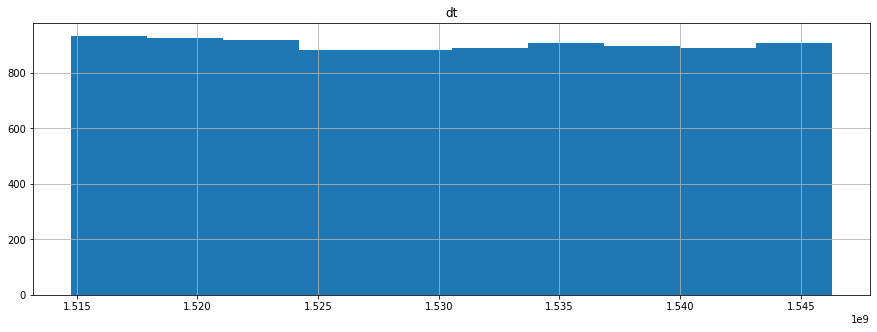

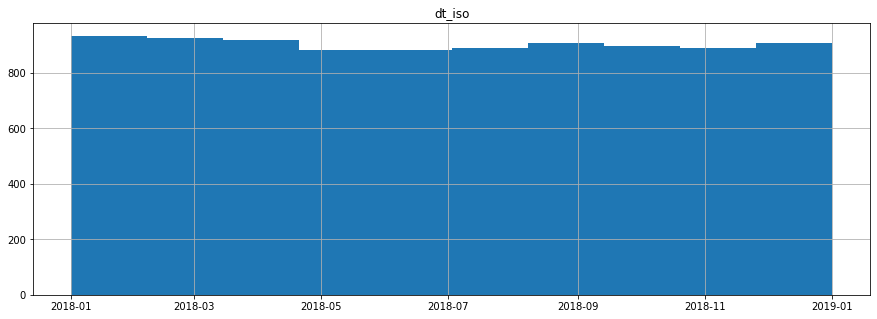

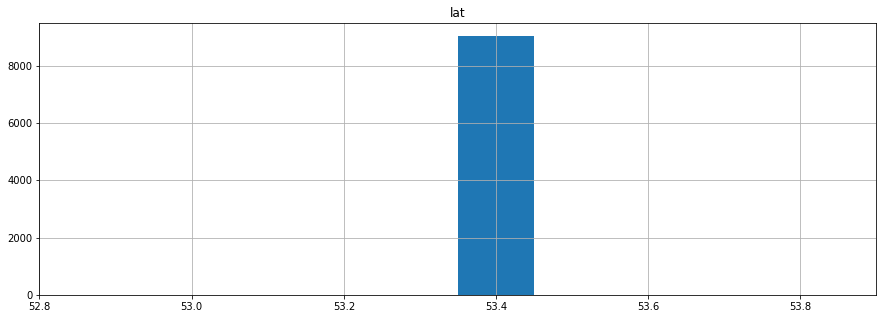

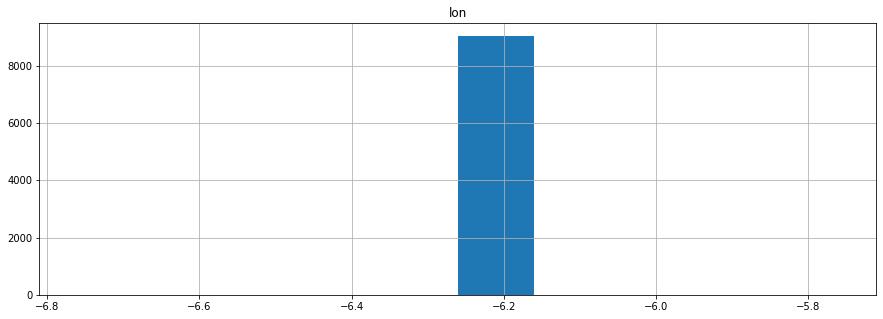

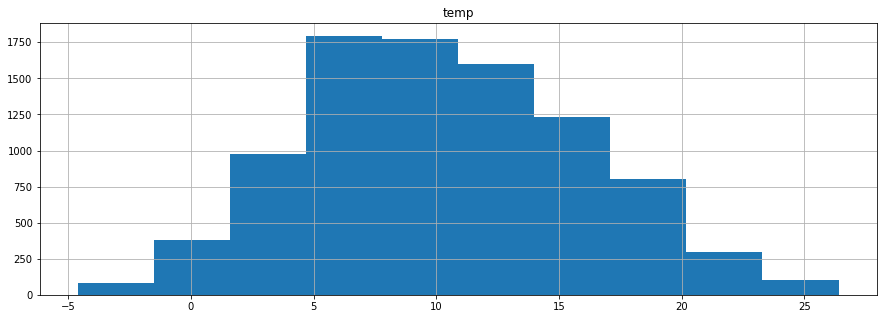

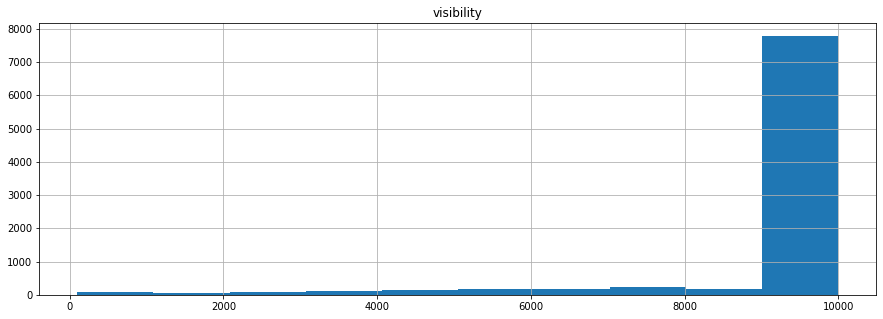

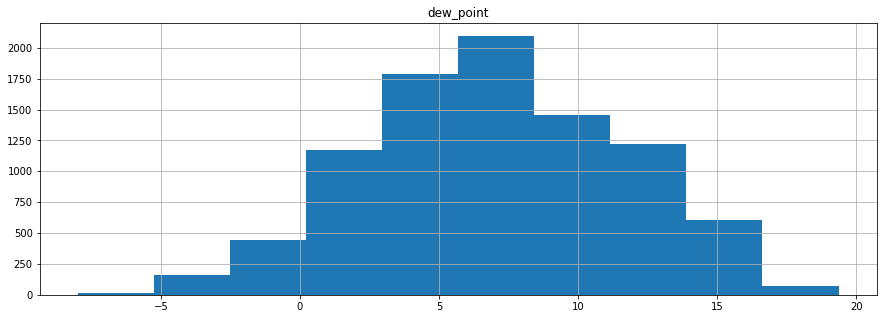

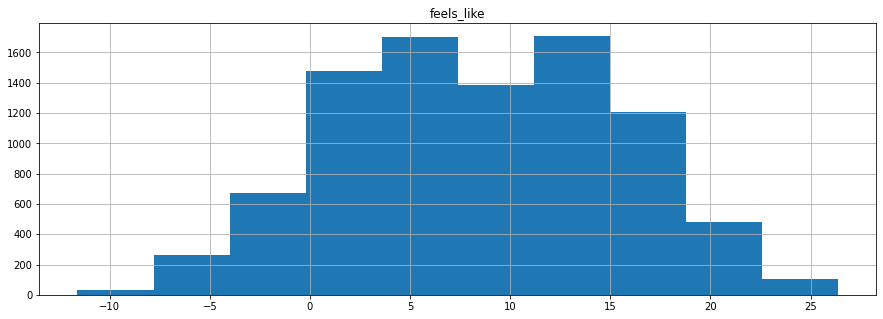

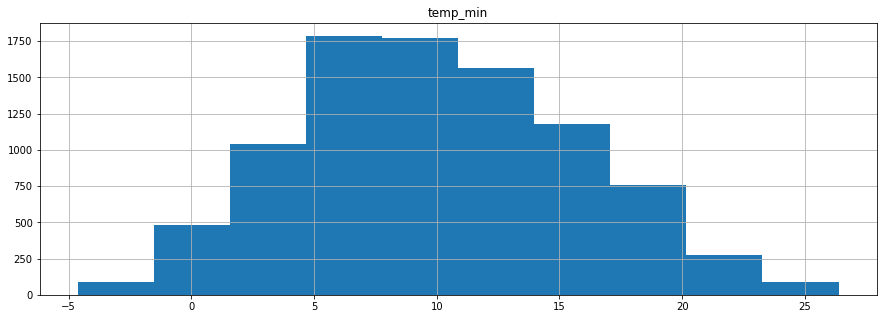

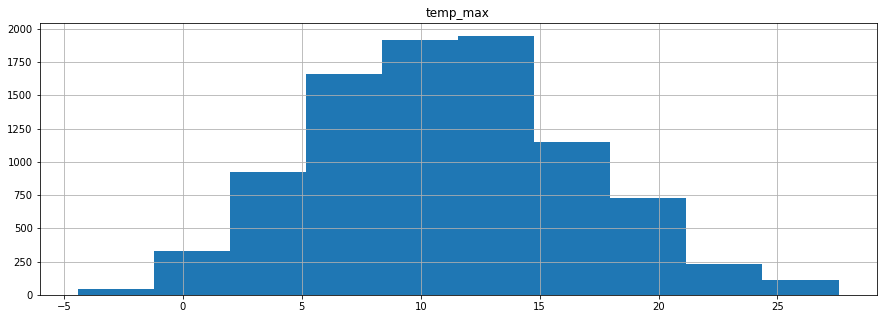

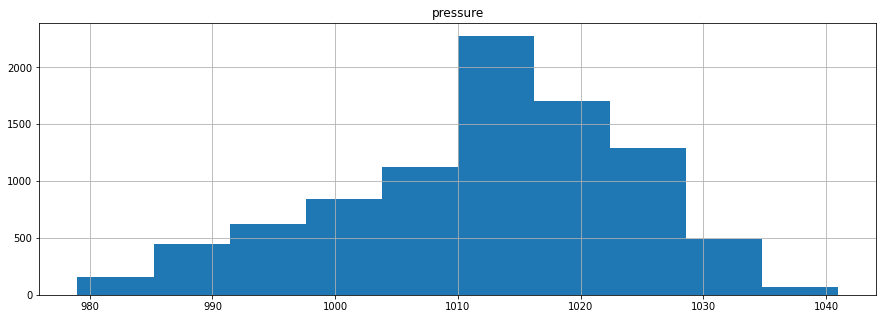

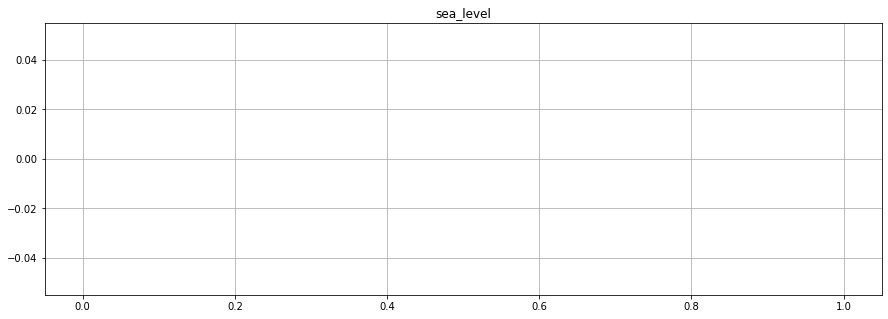

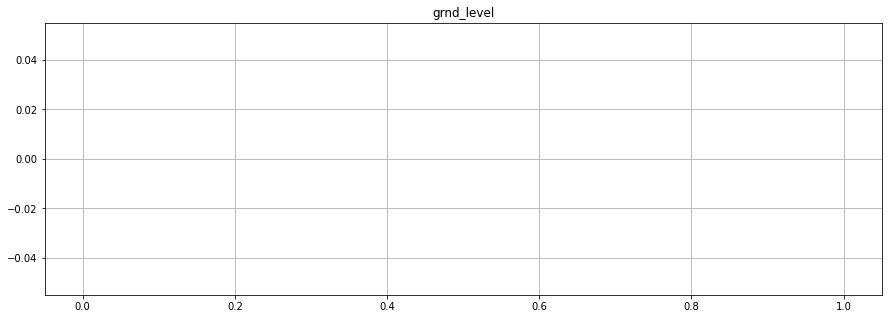

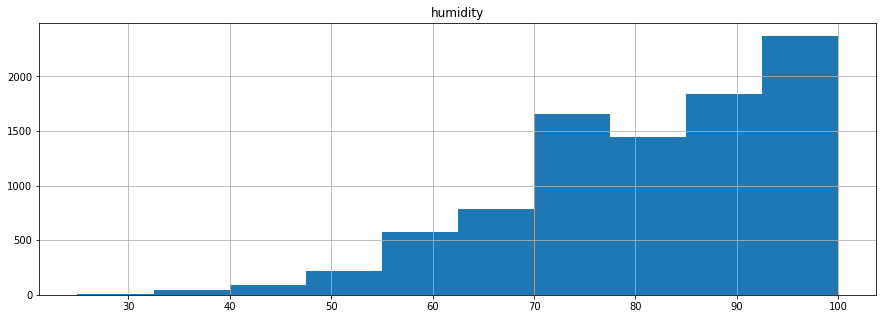

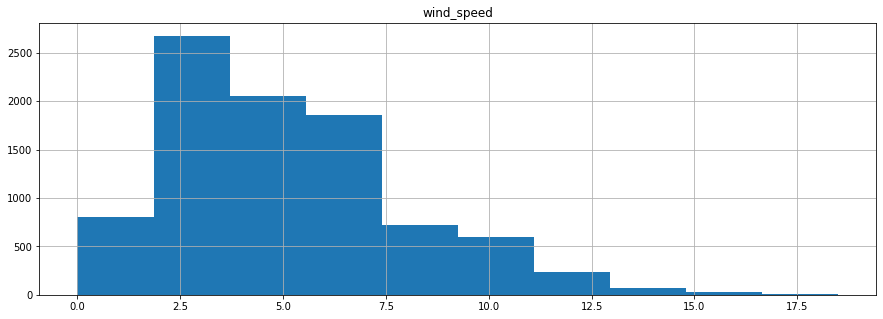

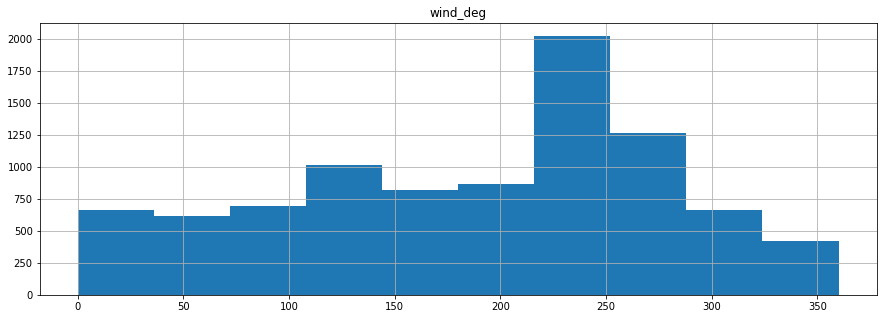

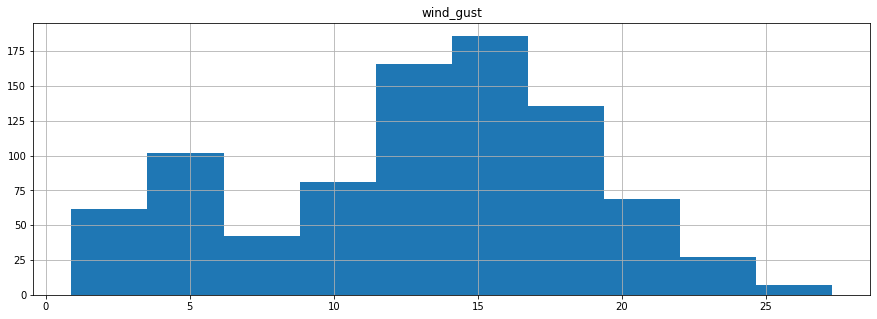

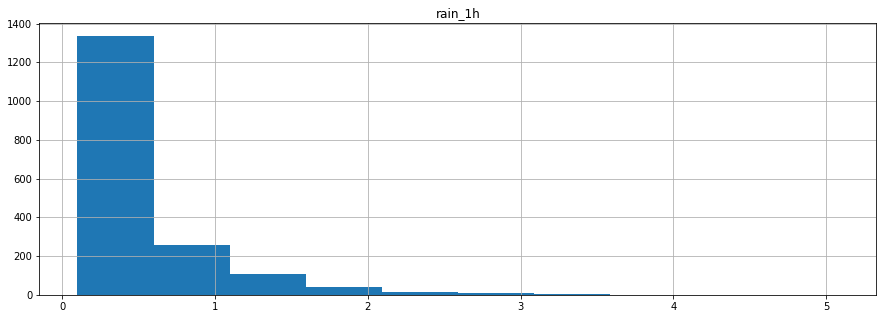

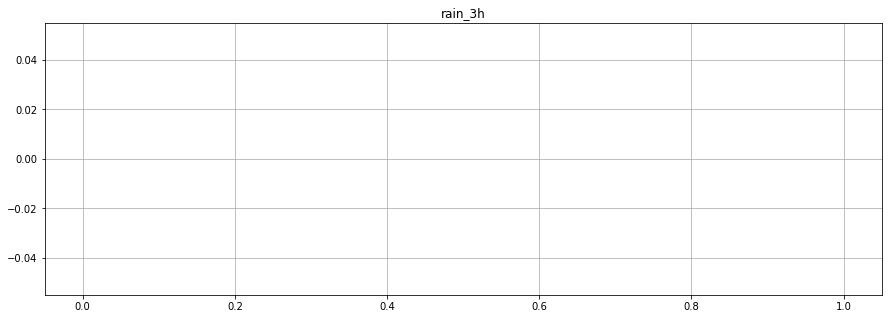

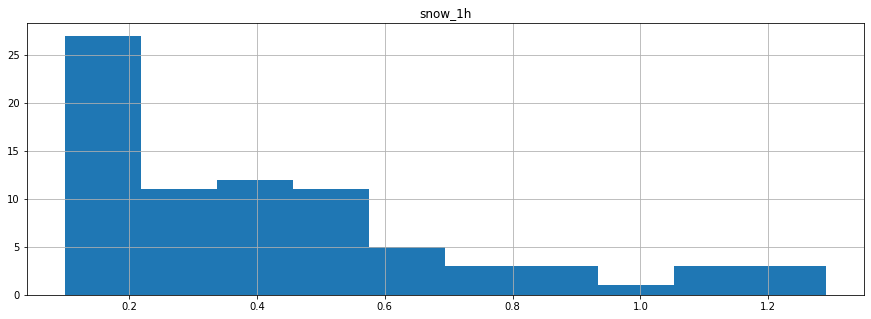

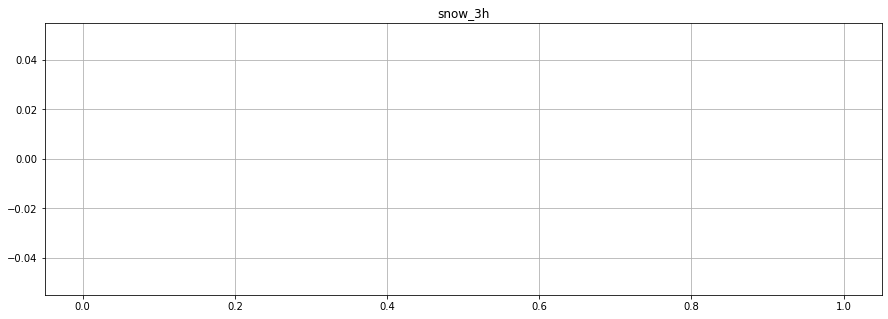

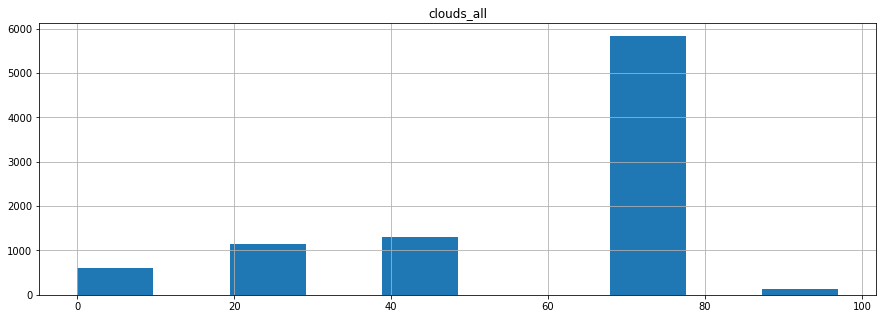

In [20]:
continous_figs_pdf = PdfPages('/Users/rebeccadillon/git/dublin-bus-team-5/data_prep/documents/figs/dqr_openweather_continuous_barcharts.pdf')
for col in continuous_cols:
 fig = df[col].hist(figsize=(15,5))
 plt.title(col)
 continous_figs_pdf.savefig(fig.get_figure(),bbox_inches='tight')
 plt.show()

continous_figs_pdf.close()

### Categorical features

In [21]:
# print descriptives for categorical columns
cardinality = df[categorical_cols].nunique()
cardinality

city_name               1
weather_main            9
weather_description    24
weather_icon           17
timezone                2
weather_id             23
dtype: int64

In [22]:
null_count = df[categorical_cols].isnull().sum()
null_count

city_name              0
weather_main           0
weather_description    0
weather_icon           0
timezone               0
weather_id             0
dtype: int64

In [23]:
df[categorical_cols].describe()

,city_name,weather_main,weather_description,weather_icon,timezone,weather_id
count,9036,9036,9036,9036,9036,9036
unique,1,9,24,17,2,23
top,Dublin,Clouds,broken clouds,04d,3600,803
freq,9036,5441,3164,1733,5331,3164


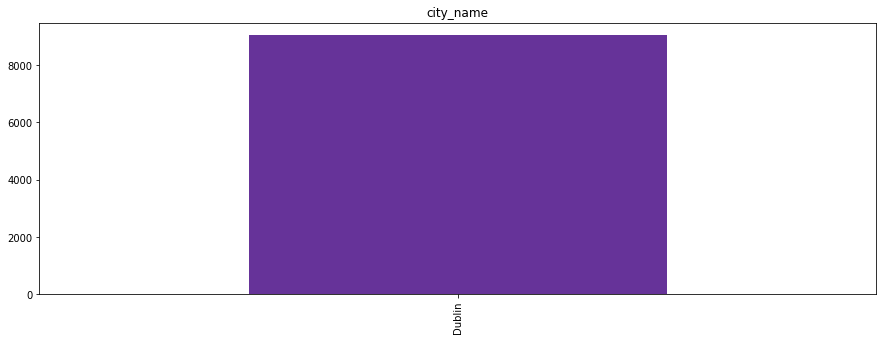

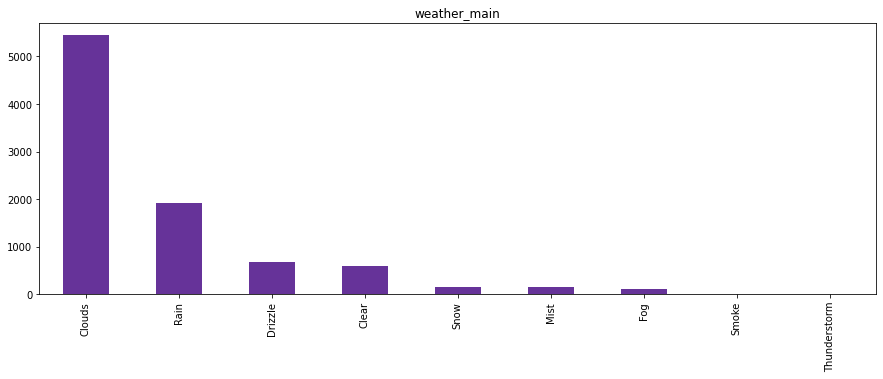

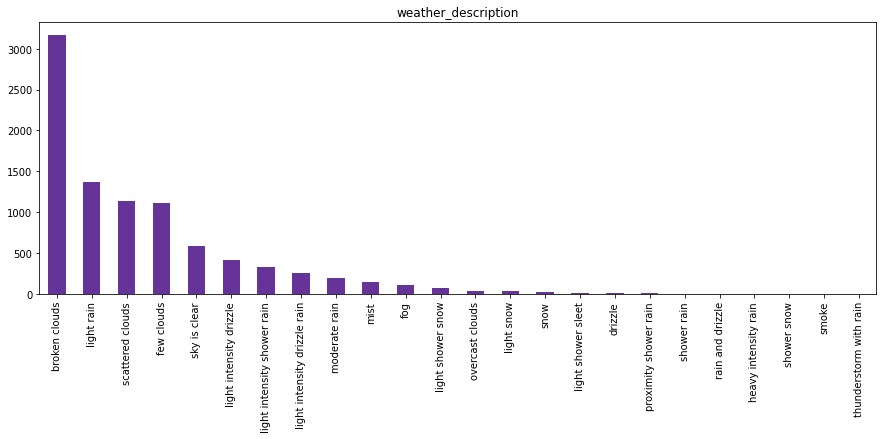

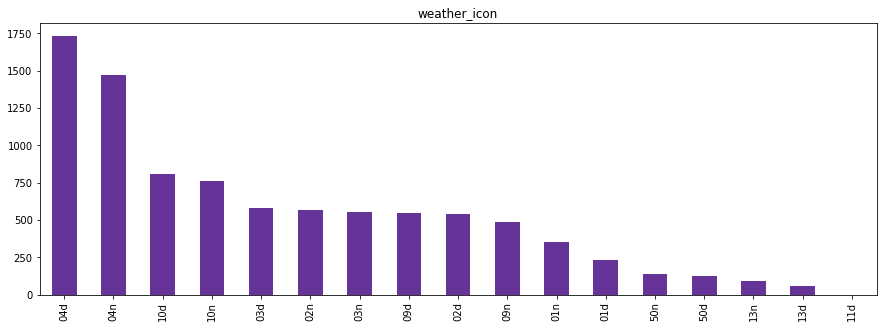

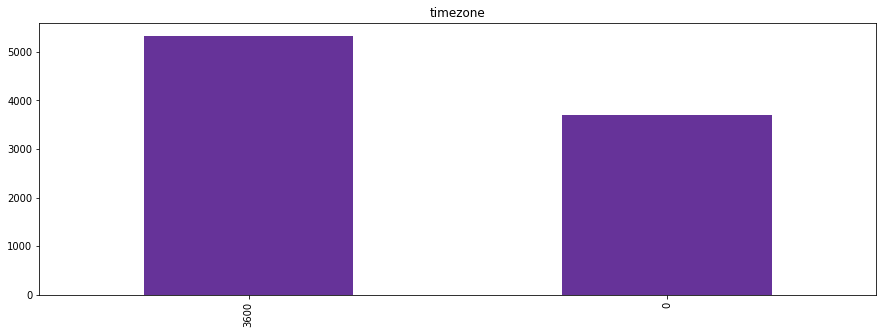

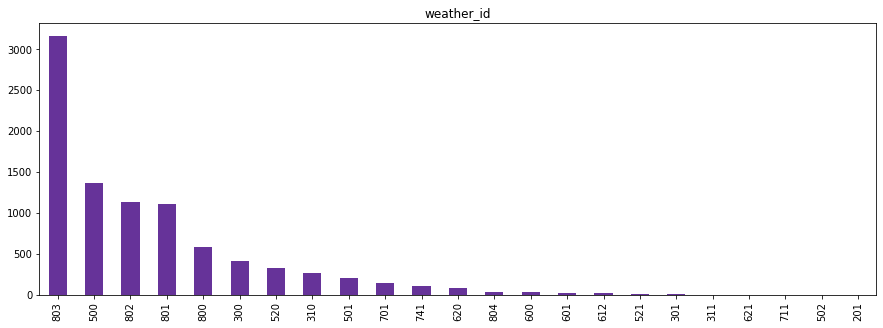

In [24]:
categorical_figs_pdf = PdfPages('/Users/rebeccadillon/git/dublin-bus-team-5/data_prep/documents/figs/dqr_openweather_categorical_barcharts.pdf')

for col in categorical_cols:
    fig = df[col].value_counts(dropna=True).plot(kind='bar', title=col, figsize=(15,5), color='rebeccapurple')
    plt.title(col)
    categorical_figs_pdf.savefig(fig.get_figure(),bbox_inches='tight')
    plt.show()
    
categorical_figs_pdf.close()

# Data Quality Plan
Initial list of issues identified in the Data Quality Report

|Feature|Data Quality Issue|Action|
|---|---|---|
|dt| Similar to dt_iso|Drop column   |
|dt_iso|  No issue|keep column   |
|timezone|Low information gain | Drop column  |
|city_name|Low information gain | Drop column  |
|lat|Low information gain | Drop column  |
|lon|Low information gain | Drop column  |
|temp| |   |
|visibility| missing values| investigate further, drop if necessary  |
|dew_point| |   |
|feels_like| |   |
|temp_min| |   |
|temp_max| |   |
|pressure| |   |
|sea_level|Null column | Drop column  |
|grnd_level| Null column | Drop column  |
|humidity| |   |
|wind_speed| |   |
|wind_deg| |   |
|wind_gust| missing values|investigate further, drop if necessary  |
|rain_1h| missing values| replace with 0  |
|rain_3h|Null column | Drop column  |
|snow_1h|missing values| replace with 0  |
|snow_3h|Null column | Drop column  |
|clouds_all| |   |
|weather_id| |   |
|weather_main| |   |
|weather_description| |   |
|weather_icon| Low information gain|Drop column   |

As per the issues identified in the DQR above, the following columns can be dropped from the dataframe:
* dt
* timezone
* city_name
* lat
* lon
* sea_level
* grnd_level
* rain_3h
* snow_3h
* weather_icon

In [25]:
df.drop(columns=['dt','timezone','city_name','lat','lon','sea_level','grnd_level','rain_3h', 'snow_3h','weather_icon'], inplace=True)

In [26]:
df.head()

,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description
0,2018-01-01 00:00:00,4.39,9999.0,2.26,-1.93,4.37,4.57,990,86,12.9,240,18.0,NaN,NaN,40,520,Rain,light intensity shower rain
1,2018-01-01 01:00:00,4.39,9999.0,2.26,-1.68,4.37,4.57,990,86,11.8,240,NaN,NaN,NaN,75,520,Rain,light intensity shower rain
2,2018-01-01 02:00:00,5.39,9999.0,2.40,-0.47,4.53,5.41,990,81,12.4,240,18.5,NaN,NaN,40,802,Clouds,scattered clouds
3,2018-01-01 03:00:00,5.39,9999.0,2.40,-0.47,4.53,5.41,990,81,12.4,240,NaN,NaN,NaN,40,802,Clouds,scattered clouds
4,2018-01-01 04:00:00,5.39,9999.0,2.40,-0.33,5.37,5.57,989,81,11.8,240,NaN,NaN,NaN,40,802,Clouds,scattered clouds


In [27]:
df['rain_1h'].describe()

count    1766.000000
mean        0.474734
std         0.484917
min         0.100000
25%         0.170000
50%         0.300000
75%         0.587500
max         5.080000
Name: rain_1h, dtype: float64

1. Change NaN values in 'rain_1h' and 'snow_1h' to zero.

In [28]:
df['rain_1h'] = df['rain_1h'].fillna(0)
df['snow_1h'] = df['snow_1h'].fillna(0)

### 2. Create a column 'snow_ice' which flags values below 0 in the 'temp' column OR where there is a value above 0 for 'snow_1h' OR where snow is indicated in 'weather_main' 

In [29]:
df['snow_ice'] = 0

In [30]:
df.loc[df['temp'] <= 0, 'snow_ice'] =  1
df.loc[df['snow_1h'] > 0, 'snow_ice'] = 1
df.loc[df['weather_main'] == 'Snow', 'snow_ice'] = 1

In [31]:
df.loc[df['snow_ice']==1]

,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description,snow_ice
171,2018-01-08 01:00:00,-0.61,9999.0,-3.28,-5.74,-0.63,2.57,1026,80,5.1,100,NaN,0.0,0.0,40,802,Clouds,scattered clouds,1
172,2018-01-08 02:00:00,-1.61,9999.0,-4.41,-6.99,-1.63,1.57,1026,79,5.1,100,NaN,0.0,0.0,40,802,Clouds,scattered clouds,1
173,2018-01-08 03:00:00,-1.61,9999.0,-3.41,-6.99,-1.63,1.57,1025,86,5.1,100,NaN,0.0,0.0,40,802,Clouds,scattered clouds,1
175,2018-01-08 05:00:00,-1.61,9999.0,-4.41,-5.95,-1.63,0.57,1024,79,3.6,120,NaN,0.0,0.0,40,802,Clouds,scattered clouds,1
176,2018-01-08 06:00:00,-1.61,9999.0,-4.41,-5.95,-1.63,0.57,1024,79,3.6,90,NaN,0.0,0.0,40,802,Clouds,scattered clouds,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,2018-10-30 04:00:00,-2.61,9999.0,-4.39,-2.61,-2.63,1.57,1000,86,1.0,180,NaN,0.0,0.0,20,801,Clouds,few clouds,1
7486,2018-10-30 05:00:00,-2.61,9999.0,-3.60,-2.61,-2.63,2.57,1000,92,0.0,0,NaN,0.0,0.0,20,801,Clouds,few clouds,1
7487,2018-10-30 06:00:00,-3.61,9999.0,-4.59,-3.61,-3.63,-0.43,1000,92,0.5,0,NaN,0.0,0.0,20,801,Clouds,few clouds,1
7488,2018-10-30 07:00:00,-3.61,9999.0,-4.59,-6.80,-3.63,-1.43,1000,92,2.1,290,NaN,0.0,0.0,20,801,Clouds,few clouds,1


### 3. I will create a boolean column named 'heavy_precip' which will indicate heavy rain or snow fall

In [32]:
df['heavy_precip'] = 0

In [33]:
#df.loc[df['rain_1h'] <= 0, 'heavy_precip'] =  1
#df.loc[df['snow_1h'] <= 0, 'heavy_precip'] =  1

In [34]:
df['rain_1h'].describe()

count    9036.000000
mean        0.092782
std         0.285268
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.080000
Name: rain_1h, dtype: float64

In [35]:
df['snow_1h'].describe()

count    9036.000000
mean        0.003727
std         0.049107
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.290000
Name: snow_1h, dtype: float64

The open weather website has condition codes which map to the weather_id column in this dataframe. Among these codes are the following 
|ID	|Main	|Description	|
|---|----|----|
500	Rain	light rain	
501	Rain	moderate rain	
502	Rain	heavy intensity rain
503	Rain	very heavy rain	
504	Rain	extreme rain	
511	Rain	freezing rain	
520	Rain	light intensity shower rain	
521	Rain	shower rain	
522	Rain	heavy intensity shower rain	 
531	Rain	ragged shower rain	 

from this list, for the purpose of defining heavy rain I will take the following IDs to identifying rows with 'heavy' rain:
501,502,503,504,511,521,522,531

In [36]:
df_raining = df.loc[df['weather_id'].isin([501,502,503,504,511,521,522,531])]
df_raining['weather_id'].unique()

[501, 521, 502]
Categories (23, int64): [201, 300, 301, 310, ..., 801, 802, 803, 804]

We can see that this dataframe only contains values for 'moderate rain','heavy intensity rain' and 'shower rain'. I will now plot a histogram to show the distribution of rain values for these weather descriptions.

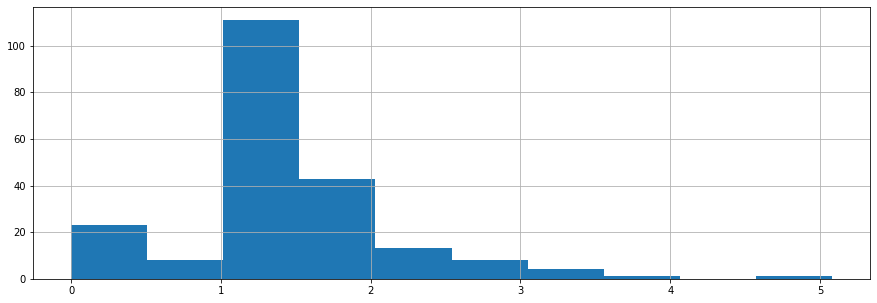

In [37]:
df_raining['rain_1h'].hist(figsize=(15,5))
plt.show()

I will also print some descriptive statistics of this data.

In [38]:
df_raining.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,212.0,9.387170,3.518681,1.39,7.2525,8.64,12.2850,18.39
visibility,206.0,8429.097087,2113.137187,1500.00,7000.0000,9999.00,9999.0000,10000.00
dew_point,212.0,7.833679,3.348719,0.30,5.3400,7.39,9.6425,17.24
feels_like,212.0,7.266274,5.081547,-3.23,3.2600,6.26,11.5725,18.71
temp_min,212.0,9.121745,3.533069,1.37,6.3700,8.37,11.5300,18.37
temp_max,212.0,10.018066,3.593722,1.57,7.5700,9.57,12.5700,20.57
pressure,212.0,999.698113,10.229286,979.00,992.0000,998.00,1008.0000,1021.00
humidity,212.0,90.415094,7.958265,61.00,87.0000,93.00,93.0000,100.00
wind_speed,212.0,6.081509,3.427327,0.45,3.6000,5.40,8.2000,18.50
wind_deg,212.0,168.702830,81.302264,0.00,128.5000,150.00,230.0000,360.00


The above describes the 'min' rain per hour value as zero. I will instead go with the Q1 value of 1.06, or greater than 1mm rain per hour to indicate 'heavy' rain.

In [39]:
df.loc[df['rain_1h'] > 1, 'heavy_precip'] = 1
df.loc[df['heavy_precip']==1]

,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description,snow_ice,heavy_precip
41,2018-01-02 17:00:00,8.39,9999.0,6.36,5.13,8.37,8.57,988,87,6.2,190,NaN,1.36,0.0,75,501,Rain,moderate rain,0,1
75,2018-01-04 03:00:00,4.39,8000.0,3.36,2.09,4.37,4.57,993,93,2.6,190,NaN,1.11,0.0,75,501,Rain,moderate rain,0,1
76,2018-01-04 04:00:00,4.39,8000.0,3.36,0.53,4.37,4.57,991,93,5.1,140,NaN,1.57,0.0,75,501,Rain,moderate rain,0,1
77,2018-01-04 05:00:00,4.39,5000.0,3.36,0.04,4.37,4.57,988,93,6.2,120,NaN,1.03,0.0,75,501,Rain,moderate rain,0,1
78,2018-01-04 05:00:00,4.39,5000.0,3.36,0.04,4.37,4.57,988,93,6.2,120,NaN,1.03,0.0,75,311,Drizzle,rain and drizzle,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8825,2018-12-23 10:00:00,7.50,4500.0,6.90,5.79,7.05,8.32,1015,96,2.6,50,NaN,1.02,0.0,75,501,Rain,moderate rain,0,1
8828,2018-12-23 12:00:00,7.58,9999.0,7.43,6.28,7.37,7.96,1017,99,2.1,30,NaN,1.02,0.0,75,310,Drizzle,light intensity drizzle rain,0,1
8829,2018-12-23 12:00:00,7.58,9999.0,7.43,6.28,7.37,7.96,1017,99,2.1,30,NaN,1.02,0.0,75,501,Rain,moderate rain,0,1
8830,2018-12-23 13:00:00,7.58,7000.0,7.43,5.88,7.37,7.96,1017,99,2.6,350,NaN,1.02,0.0,75,310,Drizzle,light intensity drizzle rain,0,1


Moving onto the snow, the following condition codes which map to the weather_id column in this dataframe were taken from the open weather website. Among these codes are the following codes for snow:


|ID	|Main	|Description	|Icon|
|---|---|---|---|
600	Snow	light snow	 
601	Snow	Snow	 
602	Snow	Heavy snow	 
611	Snow	Sleet	 
612	Snow	Light shower sleet	 
613	Snow	Shower sleet	 
615	Snow	Light rain and snow	 
616	Snow	Rain and snow	 
620	Snow	Light shower snow	 
621	Snow	Shower snow	 
622	Snow	Heavy shower snow	


From the above codes, I will identify which of these codes are in my dataframe

In [40]:
df_snowing = df.loc[df['weather_id'].isin([600,601,602,611,612,613,615,616,620,621,622])]
df_snowing['weather_id'].unique()

[612, 620, 600, 601, 621]
Categories (23, int64): [201, 300, 301, 310, ..., 801, 802, 803, 804]

The above result shows that 'light snow','snow','light shower sleet','light shower snow' and 'shower snow' are in the dataframe. I will omit those that are described as 'light', and just include the others in defining 'heavy precipitation'

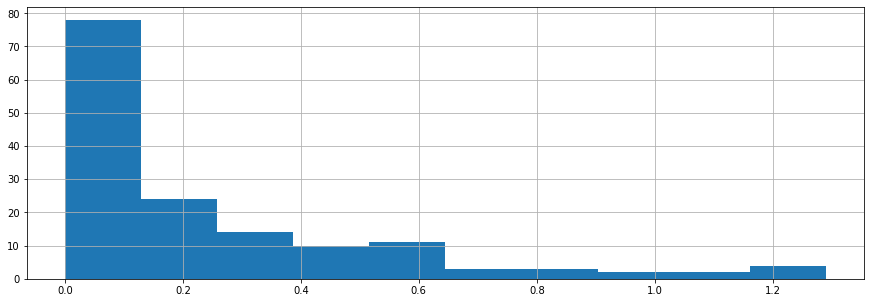

In [41]:
df_snowing['snow_1h'].hist(figsize=(15,5))
plt.show()

In [42]:
df_snowing.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,151.0,-0.171060,1.695506,-4.61,-0.610,0.39,0.875,3.39
visibility,151.0,5897.721854,3444.927150,600.00,2500.000,6000.00,9999.000,9999.00
dew_point,151.0,-1.962185,2.151980,-7.04,-4.095,-0.98,-0.540,2.37
feels_like,151.0,-6.710265,2.231024,-11.61,-7.610,-6.61,-5.350,2.39
temp_min,151.0,-0.513709,1.708865,-4.63,-1.470,-0.63,0.370,3.37
temp_max,151.0,0.166821,1.628354,-4.43,-0.430,0.41,1.570,3.57
pressure,151.0,1007.205298,11.486989,990.00,994.000,1011.00,1017.000,1028.00
humidity,151.0,87.430464,12.241193,59.00,80.000,92.00,100.000,100.00
wind_speed,151.0,10.798013,3.229189,0.00,9.150,11.30,12.900,17.00
wind_deg,151.0,115.761589,77.299738,0.00,70.000,80.00,100.000,350.00


We can see that the minimum value for snow over the past hour is 0. I will omit the categories labelled 'light' and print some descriptives again.

In [43]:
df_snowing = df.loc[df['weather_id'].isin([601,621])]
df_snowing.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,26.0,-0.119615,0.663882,-1.61,-0.6100,-0.610,0.3900,0.87
visibility,26.0,2669.230769,2348.747620,600.00,750.0000,1500.000,4375.0000,8000.00
dew_point,26.0,-0.341923,0.718922,-2.48,-0.6100,-0.610,0.1575,0.87
feels_like,26.0,-6.665385,1.435831,-7.61,-7.6100,-7.470,-6.3250,-2.66
temp_min,26.0,-0.586923,0.468656,-2.47,-0.6300,-0.630,-0.4700,0.37
temp_max,26.0,0.104231,0.805348,-1.59,-0.4300,-0.430,0.4100,1.64
pressure,26.0,998.384615,10.357903,992.00,993.0000,994.000,996.0000,1023.00
humidity,26.0,98.307692,3.159357,92.00,100.0000,100.000,100.0000,100.00
wind_speed,26.0,13.007692,4.287743,2.60,13.0250,14.650,15.4000,17.00
wind_deg,26.0,101.538462,58.562261,70.00,80.0000,80.000,80.0000,270.00


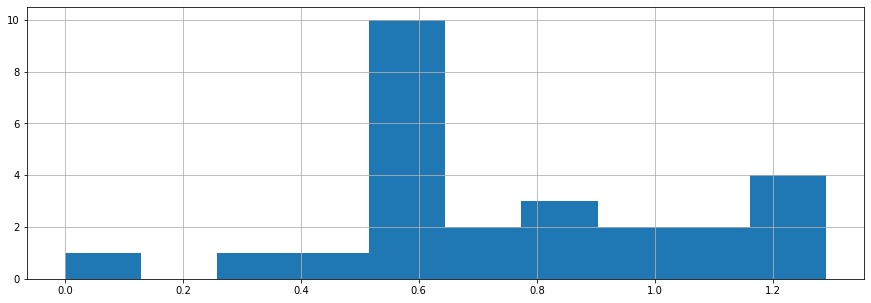

In [44]:
df_snowing['snow_1h'].hist(figsize=(15,5))
plt.show()

The above figure shows that the majority of rows have snow_1h values of 0.5 and above. For this reason I will place my snow threshold at 0.5.

In [45]:
df.loc[df['snow_1h'] > 0.5, 'heavy_precip'] = 1
df.loc[df['heavy_precip']==1]

,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description,snow_ice,heavy_precip
41,2018-01-02 17:00:00,8.39,9999.0,6.36,5.13,8.37,8.57,988,87,6.2,190,NaN,1.36,0.0,75,501,Rain,moderate rain,0,1
75,2018-01-04 03:00:00,4.39,8000.0,3.36,2.09,4.37,4.57,993,93,2.6,190,NaN,1.11,0.0,75,501,Rain,moderate rain,0,1
76,2018-01-04 04:00:00,4.39,8000.0,3.36,0.53,4.37,4.57,991,93,5.1,140,NaN,1.57,0.0,75,501,Rain,moderate rain,0,1
77,2018-01-04 05:00:00,4.39,5000.0,3.36,0.04,4.37,4.57,988,93,6.2,120,NaN,1.03,0.0,75,501,Rain,moderate rain,0,1
78,2018-01-04 05:00:00,4.39,5000.0,3.36,0.04,4.37,4.57,988,93,6.2,120,NaN,1.03,0.0,75,311,Drizzle,rain and drizzle,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8825,2018-12-23 10:00:00,7.50,4500.0,6.90,5.79,7.05,8.32,1015,96,2.6,50,NaN,1.02,0.0,75,501,Rain,moderate rain,0,1
8828,2018-12-23 12:00:00,7.58,9999.0,7.43,6.28,7.37,7.96,1017,99,2.1,30,NaN,1.02,0.0,75,310,Drizzle,light intensity drizzle rain,0,1
8829,2018-12-23 12:00:00,7.58,9999.0,7.43,6.28,7.37,7.96,1017,99,2.1,30,NaN,1.02,0.0,75,501,Rain,moderate rain,0,1
8830,2018-12-23 13:00:00,7.58,7000.0,7.43,5.88,7.37,7.96,1017,99,2.6,350,NaN,1.02,0.0,75,310,Drizzle,light intensity drizzle rain,0,1


2. Visibility missing values

In [46]:
df['visibility'].isnull().sum()

39

In [47]:
df.loc[df['visibility'].isnull()]

,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description,snow_ice,heavy_precip
1605,2018-03-05 03:00:00,4.39,NaN,3.36,2.55,3.53,4.41,983,93,2.10,90,NaN,0.00,0.0,75,701,Mist,mist,0,0
1606,2018-03-05 03:00:00,4.39,NaN,3.36,2.55,3.53,4.41,983,93,2.10,90,NaN,0.00,0.0,75,500,Rain,light rain,0,0
6449,2018-09-17 21:00:00,17.19,NaN,14.83,17.21,16.37,17.65,999,86,6.69,150,NaN,0.00,0.0,75,310,Drizzle,light intensity drizzle rain,0,0
6450,2018-09-17 22:00:00,17.17,NaN,15.34,17.27,16.37,17.67,998,89,5.14,150,NaN,0.00,0.0,75,310,Drizzle,light intensity drizzle rain,0,0
6451,2018-09-17 23:00:00,17.19,NaN,15.88,17.37,16.37,17.73,996,92,6.17,140,NaN,0.00,0.0,75,310,Drizzle,light intensity drizzle rain,0,0
6452,2018-09-18 00:00:00,17.01,NaN,15.70,17.17,16.37,17.56,995,92,6.17,140,NaN,1.59,0.0,75,310,Drizzle,light intensity drizzle rain,0,1
6453,2018-09-18 00:00:00,17.01,NaN,15.70,17.17,16.37,17.56,995,92,6.17,140,NaN,1.59,0.0,75,501,Rain,moderate rain,0,1
6454,2018-09-18 01:00:00,16.93,NaN,15.28,17.03,16.14,18.53,993,90,6.69,150,NaN,1.47,0.0,75,501,Rain,moderate rain,0,1
6455,2018-09-18 01:00:00,16.93,NaN,15.28,17.03,16.14,18.53,993,90,6.69,150,NaN,1.47,0.0,75,310,Drizzle,light intensity drizzle rain,0,1
6456,2018-09-18 02:00:00,16.40,NaN,15.43,16.55,15.68,17.13,992,94,4.63,140,NaN,1.46,0.0,90,501,Rain,moderate rain,0,1


I will see what relationship these values have with other features.

In [48]:
def bar_plot(col1, col2):
    df.groupby(col1)[col2].mean().plot.bar(cmap='Pastel2')
    plt.title(col1 + " vs " + col2)
    plt.xticks(rotation=45)
    plt.tight_layout()

In [49]:
categorical_cols = df.select_dtypes(['category']).columns
categorical_cols = categorical_cols.append(df[['snow_ice', 'heavy_precip']].columns)
categorical_cols

Index(['weather_id', 'weather_main', 'weather_description', 'snow_ice',
       'heavy_precip'],
      dtype='object')

In [50]:
continuous_cols = df.select_dtypes(['int64','float64','datetime64[ns]']).columns

In [51]:
df['visibility_null'] = 0  

In [52]:
df.loc[df['visibility'].isnull(), 'visibility_null'] = 1

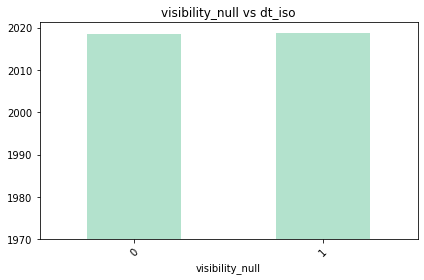

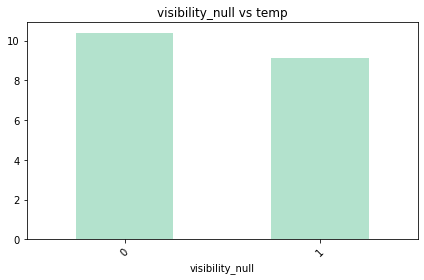

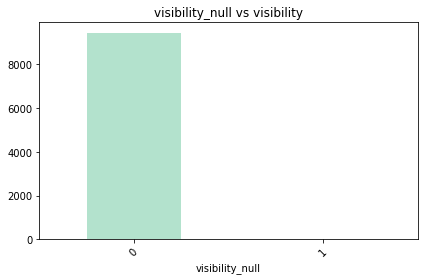

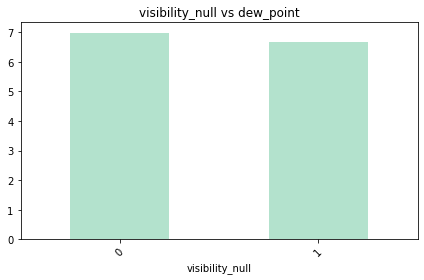

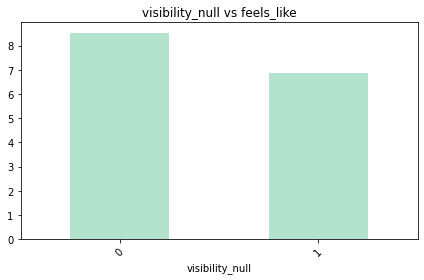

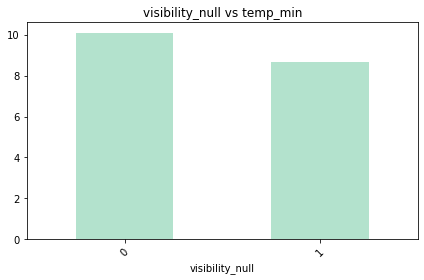

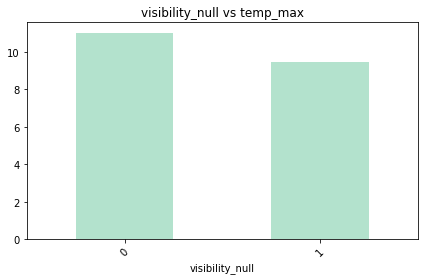

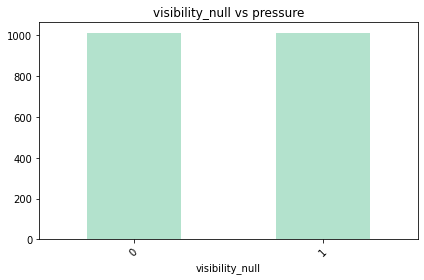

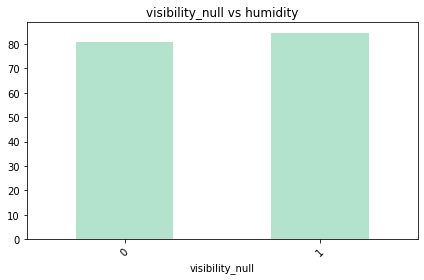

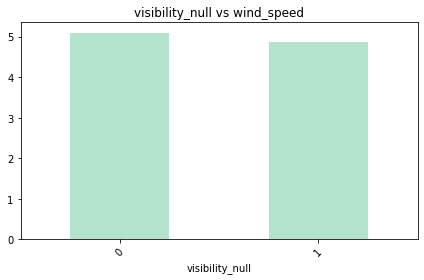

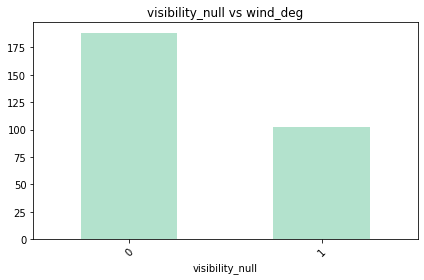

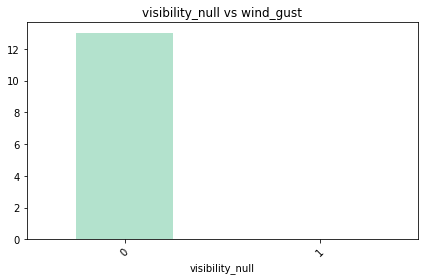

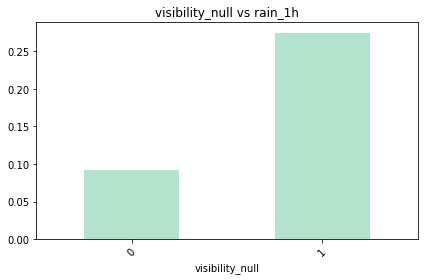

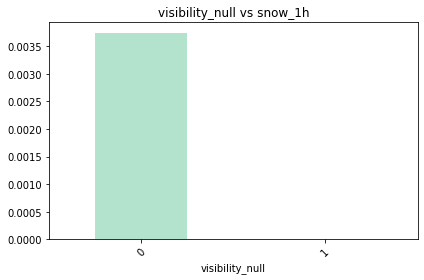

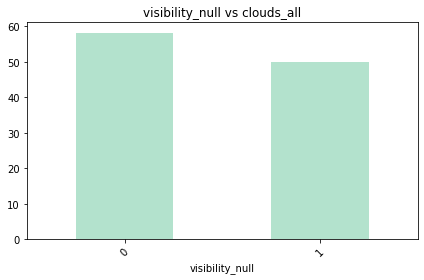

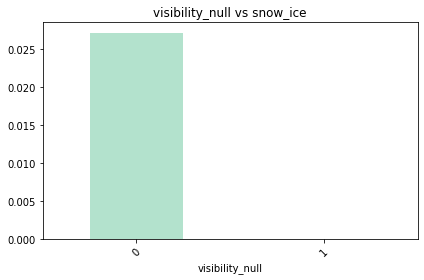

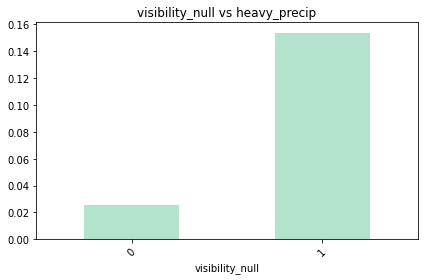

In [53]:
for col in continuous_cols:
    bar_plot('visibility_null', col)
    plt.show()

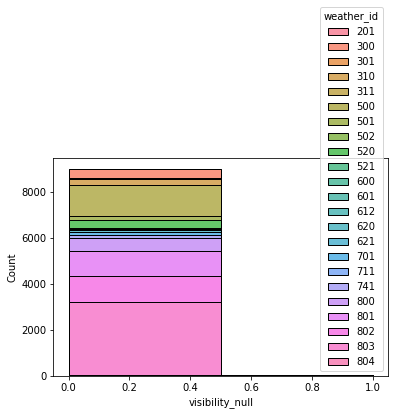

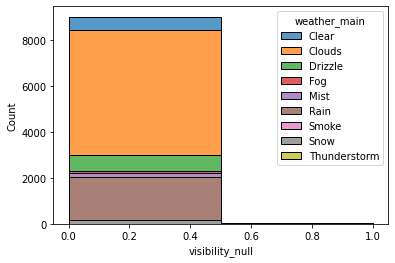

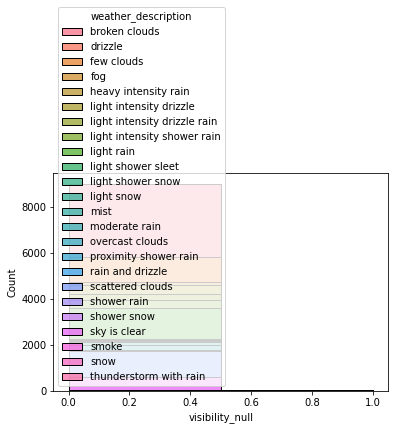

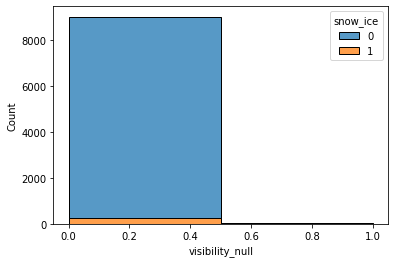

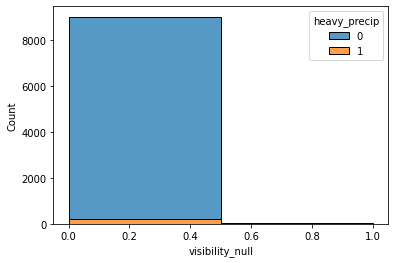

In [54]:
for col in categorical_cols:
    sns.histplot(binwidth=0.5, x='visibility_null', hue=col, data=df, stat="count", multiple="stack")
    plt.show()

It is clear from the above figures that the null values are in relation to cloud cover. As the nature of the visibility column means it is influenced by a variety of weather factors (rain, snow, cloud cover, fog etc), I will drop this column from the dataframe as it does not appear to add much information to the dataframe.

In [55]:
df.drop(columns=['visibility','visibility_null'], inplace=True)

3. Wind gust


The wind gust column contained missing values where the visibility column also held missing values. I will repeat the same steps as I did with the visibility column.

In [56]:
df.loc[df['wind_gust'].isnull()]

,dt_iso,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description,snow_ice,heavy_precip
1,2018-01-01 01:00:00,4.39,2.26,-1.68,4.37,4.57,990,86,11.8,240,NaN,0.0,0.0,75,520,Rain,light intensity shower rain,0,0
3,2018-01-01 03:00:00,5.39,2.40,-0.47,4.53,5.41,990,81,12.4,240,NaN,0.0,0.0,40,802,Clouds,scattered clouds,0,0
4,2018-01-01 04:00:00,5.39,2.40,-0.33,5.37,5.57,989,81,11.8,240,NaN,0.0,0.0,40,802,Clouds,scattered clouds,0,0
5,2018-01-01 05:00:00,5.39,2.22,0.29,5.37,5.57,990,80,9.3,240,NaN,0.0,0.0,75,803,Clouds,broken clouds,0,0
6,2018-01-01 06:00:00,5.39,2.40,0.94,4.53,5.41,990,81,7.2,240,NaN,0.0,0.0,75,803,Clouds,broken clouds,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9000,2018-12-30 12:00:00,11.48,8.34,10.80,10.38,11.65,1034,81,4.1,250,NaN,0.0,0.0,75,803,Clouds,broken clouds,0,0
9001,2018-12-30 13:00:00,11.52,8.38,10.84,10.94,12.21,1033,81,4.6,240,NaN,0.0,0.0,75,803,Clouds,broken clouds,0,0
9018,2018-12-31 06:00:00,9.46,6.37,7.80,9.27,9.57,1034,81,3.1,230,NaN,0.0,0.0,75,803,Clouds,broken clouds,0,0
9019,2018-12-31 07:00:00,9.46,6.37,7.80,9.27,9.57,1034,81,3.1,230,NaN,0.0,0.0,75,803,Clouds,broken clouds,0,0


As this column contains a lot of missing values and as we have a lot of other columns with useful weather information, I will drop this column.

In [57]:
df.drop(columns=['wind_gust'],inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9036 entries, 0 to 9035
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dt_iso               9036 non-null   datetime64[ns]
 1   temp                 9036 non-null   float64       
 2   dew_point            9036 non-null   float64       
 3   feels_like           9036 non-null   float64       
 4   temp_min             9036 non-null   float64       
 5   temp_max             9036 non-null   float64       
 6   pressure             9036 non-null   int64         
 7   humidity             9036 non-null   int64         
 8   wind_speed           9036 non-null   float64       
 9   wind_deg             9036 non-null   int64         
 10  rain_1h              9036 non-null   float64       
 11  snow_1h              9036 non-null   float64       
 12  clouds_all           9036 non-null   int64         
 13  weather_id           9036 non-nul

In [60]:
# save cleaned dataframe to new file
df.to_csv('/Users/rebeccadillon/git/dublin-bus-team-5/data/cleaned/dublin-weather-2018-cleaned-dqp.csv', index=False)

# Import cleaned weather warnings data and merge with weather data

In [ ]:
df_ww = pd.read_csv('data/weather-wearnings-cleaned-dqp.csv', parse_dates=[0,1])

In [ ]:
df_ww.head()


    if df.date <= df_ww['Valid From'] & df.date >= df_ww['Valid To']:
        df['Warning Colour'] = df_ww['Warning Colour']
        df['Warning Element'] = df_ww['Warning Element']
    else:
        df['Warning Colour'] = np.nan
        df['Warning Element'] = np.nan